Dummy strategy to figure out how the components interact with one another

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dataclasses import dataclass
from typing import List, Any

In [2]:
sns.set(color_codes=True, style='whitegrid', context='paper')
plt.rcParams["figure.figsize"] = 15, 10

In [3]:
def make_dwap_df(df, group_width, short_ma, long_ma):
    
    if "dollars" not in df.columns:
        df["dollars"] = df["size"] * df["price"]
    
    df["group"] = (df["dollars"].cumsum() // group_width)  # will be affected by different initial conditions
    new_series = {}  # timestamp : dwap
    
    for grp, gdf in df.groupby("group"):
        timestamp = gdf.index[-1] # last timing, prevent lookahead
        dwap = (gdf["size"].values * gdf["price"].values).sum() / gdf["size"].values.sum()
        new_series[timestamp] = dwap
        
    df = pd.Series(new_series, name="dwap").to_frame()
    df[f"{short_ma}ma"] = df["dwap"].rolling(short_ma).mean()
    df[f"{long_ma}ma"] = df["dwap"].rolling(long_ma).mean()

    return df

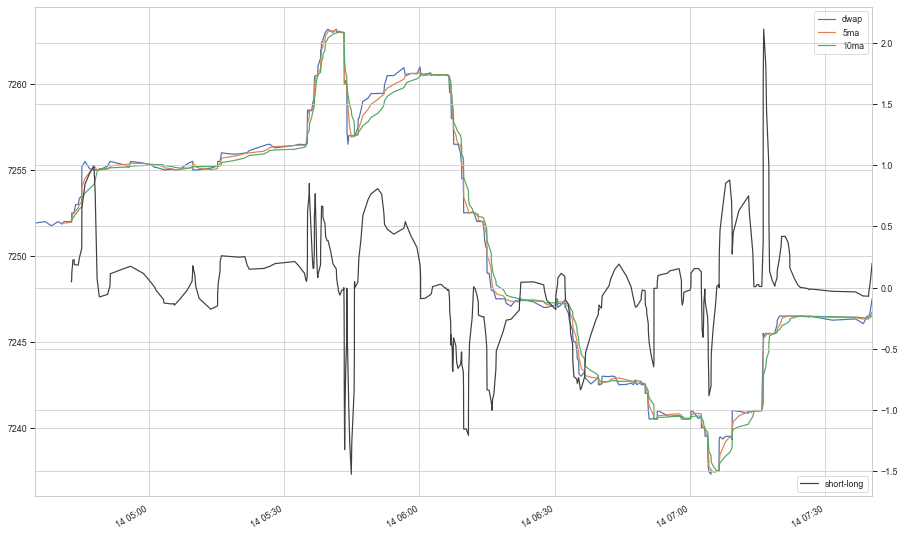

In [4]:
df = pd.read_csv(
    "play_data/XBTUSD_trades_191214_0434.csv",
    usecols=[
        "received",
        "size",
        "price"
    ],
    parse_dates=["received"],
    index_col="received",
    nrows=20000
)

df["dollars"] = df["size"] * df["price"]

# parameters
# group_width = 50 * df["dollars"].quantile(0.75)  # arbitrary
group_width = 680850400  # arbitrary
short_ma, long_ma = 5, 10  # maybe can use EWM but will need more parameters

ddf = make_dwap_df(df, group_width, short_ma, long_ma)

ax1 = ddf.plot()
ax2 = ax1.twinx()
ax2.plot(ddf["5ma"] - ddf["10ma"], label="short-long", c="0.25")
plt.legend(loc="lower right");

In [5]:
@dataclass
class DWMParameters:
    __slots__ = "group_width", "short_ma", "long_ma"
    group_width : float
    short_ma_window : int
    long_ma_window : int
        
    def __repr__(self):
        return f"{'group_width':12}: {group_width}\n{'short_ma':12}: {short_ma}\n{'long_ma':12}: {long_ma}"
        
        
@dataclass
class DWMCache:
    __slots__ = "short_ma_vals", "increasing", "curr_dollar_bar"
    short_ma_vals : List[int]
    long_ma_vals : List[int]
    increasing: bool
    curr_dollar_bar : pd.DataFrame  # columns: size, price
    remaining_group_size : float
    
    
class DollarWeightedMACD:
    # Dollar bars; only uses size and price
    
    def __init__(self, df):
        print("initializing")
        group_width = 680850400  # arbitrary, eventually can dynamically adjust
        short_ma, long_ma = 5, 10  # maybe can use EWM but will need more parameters
        
        self.ddf = make_dwap_df(df, group_width, short_ma, long_ma)
        self.params = DWMParameters(group_width, short_ma, long_ma)
        self.cache = None
    
    def generate_signal(self, size, price):
        # call whenever a new tick comes in
        # generates buy or sell signal based on most recent tick and cache
        return 1
    
    def update_cache(self, size, price):
        # call after signal is generated
        # stores relevant window of data
        print("updating cache")
    
    def update_parameters(self, size, price):
        # adjust group width, MA lookback periods
        print("updating parameters")
        
d = DollarWeightedMACD(df)
d.params

initializing


AttributeError: 'DWMParameters' object has no attribute 'short_ma_window'